# 01. PyTorch Workflow

## Table of Contents

- [All Links in Document](#links)
- [PyTorch Workflow](#workflow)
- [Loading and Preparing Data](#loadprep)
- [Building a Model](#buildmodel)
- [Training a Model](#trainmodel)

## All Links in Document <a name="links"></a>

- https://pytorch.org/docs/stable/nn.html
- https://realpython.com/python3-object-oriented-programming/
- https://pytorch.org/docs/stable/generated/torch.nn.Module.html
- What is a Neural Network?: https://www.youtube.com/watch?v=aircAruvnKk
- Gradient Descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
- Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U
- https://pytorch.org/tutorials/beginner/ptcheat.html
- https://twitter.com/pytorch/status/1437838231505096708
- https://pytorch.org/docs/stable/nn.html#loss-functions
- https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html
- https://pytorch.org/docs/stable/optim.html

## PyTorch Workflow <a name="workflow"></a>

There are many different workflows to follow for a project. This section of the document will explore one example workflow. The workflow changes depending on which steps are necessary. The below image shows a typical workflow with example steps.

<img src="images/01_workflow.png" width="750" />

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.13.1+cu117'

torch.nn houses all the necessary tools and building blocks for working with neural networks. The docs are found at https://pytorch.org/docs/stable/nn.html

## Loading and Preparing Data  <a name="loadprep"></a>

Data can be almost anything in machine learning. Example data formats are:
- Excel spreadsheet
- An image
- Videos
- Audio
- DNA
- Textual sequences

Machine learning is a game of 2 steps:
- Convert data into numerical representation
- Find patterns in the numerical data with a model

Example linear regression formula: $Y_i=f(X_i,\beta)+\epsilon_i$

In [3]:
# Manually creating some data using a linear regression
# Known parameters
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

Bias = intercept, weight = slope

In [4]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

It's also necessary to split the dataset into various smaller datasets. This is always a split between a training and testing dataset, and occasionally a validation dataset as well. The splitting is done according to a test design, which determines the percentage of data to use for each split. Common ratios between training, validation, and testing datasets are:
- 80:10:10
- 70:15:15
- 60:20:20

In a school analogy, the training set equates to the course materials to study on, the validation set equates to a practice exam (which is optional), and the testing set equates to the final exam.

<img src="images/01_traintestsplit.png" />

In [5]:
# Manually creating a simple train/test split with an 80:20 ratio
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
# Simple visualization function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend()

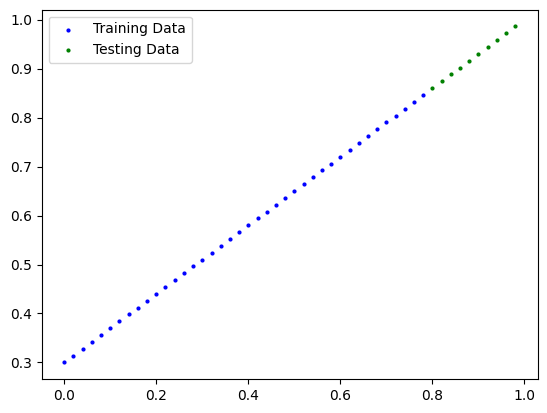

In [7]:
plot_predictions()

## Building a Model <a name="buildmodel"></a>

What is a Neural Network?: https://www.youtube.com/watch?v=aircAruvnKk

A neuron is essentially "a thing that holds a number", specifically a number between 0 and 1. Using a neural network that uses images containing handwritten numbers between 0 and 9 as input as an example, a neuron here would correspond to a pixel. If an image of size 28x28 is used, that totals to 784 pixels and thus 784 neurons. Each neuron has an "activation", which refers to the numerical value of the neuron. As mentioned, this ranges from 0 to 1. In an example greyscale image, this could refer to the shade of the pixel, with 0 being black and 1 being white. A 28x28 image thus has 784 pixels, meaning 784 neurons, and 784 activations. This is what the input layer will consist of. Each neuron will also have a weight associated with it, which is a random number representing the importance of said for another neuron in the next layer. This gets adjusted over time as the neural networks learns.

What happens inside the hidden layers is explained later. For each of the neurons inside the next hidden layer, a calculation is made based on the weights, activations, and optional bias of neurons in the previous layer. At the beginning of the neural network, this calculation is logically made on the input layer. Assume the following structure:

<img src="images/01_nnexample.png" />

An example formula of the calculation made for the first neuron of layer on the right (the first hidden layer) would be:

$a_1=\sigma(w_1x_1 + w_2x_2 + ... + w_nx_n + b_0)$

where; $a_1$ is the first neuron of the hidden layer, $\sigma$ is the sigmoid function, $w$ is the weight of a specific activation, $x$ is a specific activation, and $b$ is the bias.

The output of such a formula is a totally random number as the weights are random, the activations are random, and the bias is any arbitrary number as well. The result of this weighted sum can be squished into a number between 0 and 1 to make its output legible. This is done with the sigmoid function in the formula. The end result is then fed to the neuron of the input layer. This process is repeated for all neurons of the input layer for every neuron of the next hidden layer.

The formula can also be displayed in matrix multiplication form:

<img src="images/01_nnmatmul.png" />

The entire transition of activations from one layer to the next can be summarized to a small expression:

$a^\text{(1)} = \sigma(Wa^\text{(0)}+b)$

where; $a^\text{(1)}$ is the first hidden layer, $W$ represents the weights, $a^\text{(0)}$ is the input layer, $b$ are all the biases, and $\sigma$ is again the sigmoid function. How the hidden layers work and how the neural network learns is mainly done through two main algorithms, which are:
- Gradient Descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
- Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U

Gradient Descent: https://www.youtube.com/watch?v=IHZwWFHWa-w

How the neural network "learns" is by feeding it lots of data to train on, and then testing the neural network on new, testing data that it has never seen before. Then, it's possible to see how accurately the neural network overall comes to the right conclusion. But how does the neural network actually learn and improve? Theoretically, it's very similar to calculus and finding the minimum of a certain function. 

Recall that for each neuron in a layer, it is connected to all the neurons of the previous layer. The weights are like the strength of those connections and the bias is some indication of whether the neuron tends to be active or inactive. Starting off, all these weights and biases are initialized randomly. At the beginning, the network will naturally perform really badly. But it's necessary to be able to tell the network if it's doing its job poorly or not. This is where a "cost function" comes into play.

A cost function calculates a number by taking the squared differences between the resulting activations and expected activations of the output layer. The resulting number is the cost of a single training example. This sum is very small when the network classifies the image correctly, and high when it seems like the neural network doesn't know what it is doing.

<img src="images/01_costfunction.png" />

Then it's possible to take the average cost of all training examples, which serves as a measure for how good or bad the neural network is performing. This adds another layer of complexity to the model. Recall that in this example, the input consists of 784 neurons (pixels), the output consists of 10 neurons (numbers 0 to 9), and overall there are about 13,002 parameters (weight & biases). The number of parameters is arbitrary and in this case originates from a calculation that includes the number of neurons in two hidden layers from the original 3blue1brown YouTube video, not shown here.

The cost function takes those 13,002 parameters as input, the output is a single number (describing how good or bad the weights & biases are), and the parameters are the many, many thousands of pieces of training data.

View the cost function not as a huge function with many parameters, but as a simple function with one number as input and one as output instead: $C(w)$. How do you find the input that minimizes the value of the function? The flexible tactic is to start at a random input and in which direction you should step to make that output lower. Specifically, this means that if you can figure out the slope of the function, shift to the left if it's positibe, and shift to the right if it's negative. Repeating this process makes you approach a local minimum of the function.

<img src="images/01_localminima.png" />

Note that these are local minima, and visually it's possible to get stuck in a valley that contains a minimum for that region of the graphed function, which is not the global minimum. Thus, there is no guarantee that the found local minimum is the smallest possible value of the cost function. It's also important to keep in mind that the cost function is an average representation of the results of all training data. A lower cost function is thus an improvement on all samples (numbers 0 to 9 in this example).

For visualization purposes, it's possible to organize the 13,002 weights and biases into a giant column vector. The negative gradient of the cost function is just another vector of positive and negative nudges to augment the weight/bias vector with to cause the most rapid decrease to the cost function. And of course, making the weights and biases decrease the cost functon means that the output looks less random and more accurate. This process of continuously nudging the input of a function by some multiple of a negative gradient is called gradient descent.

<img src="images/01_gradientdescent.png" />

Each component of the negative gradient tells two things:
- The sign of the number states whether the corresponding component of the input vector should be nudged up or down
- The relative magnitude of the number also tells you which changes matter more

<img src="images/01_gradientmeaning.png" />

Thus, the gradient of the cost function tells you what nudges to all of the weights and biases cause the fastest change to the value of the cost function. This can also be interpreted as which changes to which weights matter the most. This information pertains to very basic neural networks and more complicated ones build on top of these fundamentals.

Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U

Backpropagation is the algorithm for how a single training example would like to influence the weights and biases. Not only in terms of up and down, but also in terms of which changes proportionally cause the most rapid decrease to the cost.

Assume that you're at the start of using the neural network, at which point it's not properly trained and only returns bad results. It's only possible to influence the weights and biases. However, it's useful to keep track of which changes you wish to take place. For example, when classifying an image of the number 2, you want the activation value of the number 2 neuron in the output layer to increase, and for the others to decrease. Moreover, the magnitude of those changes should be proportional to how far away each current value is away from its target value. An increase to the number 2 neuron is more important than a decrease to the other neurons. In the same vein, if a certain output neuron already has a low activation, a decrease to it is less important than a decrease to another output neuron which doesn't represent number 2.

However, this is only what the output digit 2 neuron would want. In this case, all the other neurons (representing the number 0 to 1, and 3 to 9) should become less active. The other output neurons also have their own ideas of how the previous layers should be influenced.

<img src="images/01_backprop.png" />

This is where the backpropagation term comes in. By adding together all these desired effects, you end up with a combined list of nudges that you wish to happen to the second to last layer. Then it's possible to apply the same process for the weights and biases of the previous layer before that one as well. also, this is all how only a single training example (classifying 2) works. If this is all the neural network would listen to, it would classify every image as a 2. This makes it necessary to apply the same process for all training examples. Then you can average together the changes in weights and biases that the model wishes to happen.

<img src="images/01_backpropaverage.png" />

Realistically, it takes computers an extremely long time to add up all the influences of every single training step for every gradient descent step. Instead, it's possible to randomly shuffle the data and to then divide it into small batches. Then you can compute a gradient descent step according to the batches, instead of individual images. This is not the most efficient step downhill, but each small batch will give a good approximation. More importantly, it gives a significant computational speedup. This is called stochastic gradient descent.

Thus, backpropagation is the algorithm for determining how a single training example should nudge the weights and biases. Not only up or down, but also in terms of the relative proportion of change that would cause the most rapid decrease in cost. A true gradient descent step would involve performing this for all training images, but this is computationally expensive and slow. Instead, batches are made to perform the operations on.

Extra OOP for classes help if necessary: https://realpython.com/python3-object-oriented-programming/

In [8]:
# Create linear regression model class from scratch
# Almost everything in PyTorch inherits from nn.Module
# requires_grad often defaults to True, and dtype defaults to torch.float32
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

What this model does:
- Start with random values (weight & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values

The documentation at https://pytorch.org/docs/stable/generated/torch.nn.Module.html states:
- Base class for all neural network modules.
- Your models should also subclass this class.

<img src="images/01_linear_model.png" />

Model building essentials:

- torch.nn: Contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
- torch.nn.Parameter: What parameters should the model try and learn, often a PyTorch layer from torch.nn will set these up
- torch.nn.Module: The base class for all neural network modules, if you subclass it, you should overwrite forward()
- torch.optim: This where the optimizers in PyTorch live, they will help with gradient descent
- def forward(): All nn.Module subclasses require forward() to be overwritten, this method defines what happens in the forward computation

PyTorch cheat sheet: https://pytorch.org/tutorials/beginner/ptcheat.html

In [9]:
# Manually setting seed to reproduce RNG + creating an instance of the LinearRegressionModel class
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [10]:
# Check parameters of model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# Check parameters of model as a dictionary
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
# The ideal weight & bias to strive for
weight, bias

(0.7, 0.3)

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

Inference mode: https://twitter.com/pytorch/status/1437838231505096708

In [14]:
# Making predictions with torch.inference_mode()
# When passing data, automatically uses the forward method
# Inference mode gets rid of the gradient tracking as it's unnecessary for this example
# Keeps track of less data, could be useful for larger datasets
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

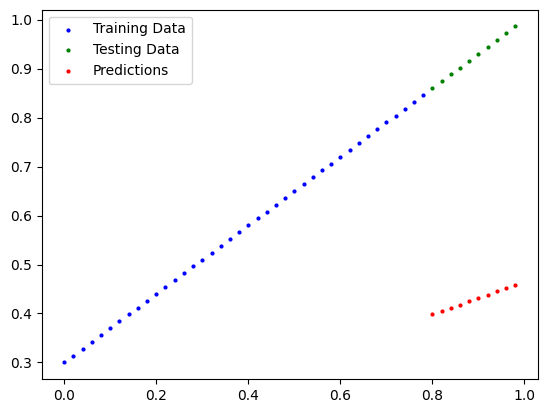

In [15]:
# Predicted values are naturally bad at first
plot_predictions(predictions=y_preds)

In [16]:
# Gradient tracking is performed now
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

## Training a Model <a name="trainmodel"></a>

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters. Or in other words from a poor representation of the data to a better representation of the data. One way to measure how poor or how wrong your models predictions are is to use a loss function. This loss function is also referred to as criterion or cost function (explained during gradient descent).

Things necessary to train:
- Loss function: The function to measure how wrong the model's predictions are, a lower number means higher performance
- Optimizer: Takes into account the model's loss and adjusts the model's parameters (e.g., weights and bias) to improve the loss function

Specifically for PyTorch, also needed are:
- A training loop
- A testing loop

Loss function docs: https://pytorch.org/docs/stable/nn.html#loss-functions<br>
L1Loss (MAE): https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html<br>
Optimizers: https://pytorch.org/docs/stable/optim.html

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer (Stochastic Gradient Descent)
# A larger learning rate means larger adjustments to the parameters (decimal sensitive)
# The parameters are set by the model, the hyperparameters (lr) are set by us
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

But which loss function and optimizer to use depends on the specific use case. This information is gained as experience and knowledge grows. For a regression problem like this example, `nn.L1Loss()` (Mean Absolute Error) and `torch.optim.SGD()` (Stochastic Gradient Descent) suffice. But for a classification problem, a loss function like `nn.BCELoss()` (Binary Cross Entropy Loss) would be more useful.

A couple of things are needed in a training loop:
- Loop through the data
- Perform a forward pass (applying the model's forward function(s) to the data), also referred to as forward propagation
- Calculate the loss (compare forward pass to actual data)
- Optimize zero grad
- Loss backwards (move backwards through the network to calculate the gradient of each of the parameters of the model with respect to the loss), also referred to as backpropagation
- Optimizer step (use the optimizer to adjust the model's parameters to try and improve loss), also referred to as gradient descent

<img src="images/01_trainloop.png" />

In [19]:
# An epoch is one loop through the entire data
epochs = 100

for epoch in range(epochs):
    # Setting the model to training mode sets all parameters that require gradients to require gradients
    model_0.train()
    # Perform forward pass
    y_pred = model_0(X_train)
    # Calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f"Epoch: {epoch} | Loss: {loss}")
    # Set gradients to 0
    optimizer.zero_grad()
    # Perform backwards propagation
    loss.backward()
    # Perform gradient descent
    optimizer.step()
    # Turn off several settings not needed for testing and evaluation
    model_0.eval()
    # Turn off gradient tracking and a few more things...
    with torch.inference_mode():
        # Forward pass
        test_pred = model_0(X_test)
        # Calculate loss
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 1 | Loss: 0.3013603389263153
Epoch: 2 | Loss: 0.28983935713768005
Epoch: 3 | Loss: 0.2783183455467224
Epoch: 4 | Loss: 0.26679736375808716
Epoch: 5 | Loss: 0.2552763521671295
Epoch: 6 | Loss: 0.24375534057617188
Epoch: 7 | Loss: 0.23223432898521423
Epoch: 8 | Loss: 0.22071333229541779
Epoch: 9 | Loss: 0.20919232070446014
Epoch: 10 | Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 11 | Loss: 0.18615034222602844
Epoch: 12 | Loss: 0.1746293306350708
Epoch: 13 | Loss: 0.16310831904411316
Epoch: 14 | Loss: 0.1515873372554779
Epoch: 15 | Loss: 0.14006635546684265
Epoch: 16 | Loss: 0.1285453587770462
Epoch: 17 | Loss: 0.11702437698841095
Epoch: 18 | Loss: 0.1060912236571312
Epoch: 19 | Loss: 0.09681284427642822
Epoch: 20 | Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 21 

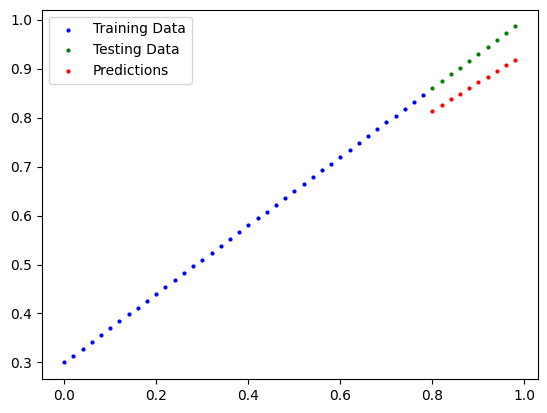

In [20]:
# Results improve with more epochs!
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)